<a href="https://colab.research.google.com/github/RajanVishnoi/USA_accident_analysis/blob/main/us_accident_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# us-accident-analysis

Use the "Run" button to execute the code.

In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

od.download('https://www.kaggle.com/sobhanmoosavi/us-accidents')

Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


In [ ]:
import pandas as pd

df= pd.read_csv('/content/us-accidents/US_Accidents_Dec20_updated.csv')

In [ ]:
df.head()

ID  Severity  ... Nautical_Twilight Astronomical_Twilight
0  A-2716600         3  ...             Night                 Night
1  A-2716601         2  ...             Night                 Night
2  A-2716602         2  ...             Night                   Day
3  A-2716603         2  ...             Night                   Day
4  A-2716604         2  ...               Day                   Day

[5 rows x 47 columns]

**lets find out the number of unique values in each column**

In [ ]:
df.nunique()

ID                       1516064
Severity                       4
Start_Time               1037092
End_Time                 1161415
Start_Lat                 590611
Start_Lng                 603369
End_Lat                   587824
End_Lng                   599916
Distance(mi)               11514
Description               527655
Number                     37592
Street                     93048
Side                           2
City                       10657
County                      1671
State                         49
Zipcode                   177196
Country                        1
Timezone                       4
Airport_Code                1985
Weather_Timestamp         331748
Temperature(F)               775
Wind_Chill(F)                883
Humidity(%)                  100
Pressure(in)                1007
Visibility(mi)                74
Wind_Direction                24
Wind_Speed(mph)              121
Precipitation(in)            187
Weather_Condition            116
Amenity   

In [ ]:
#drop id 
#drop country because we have only one country
df.drop(['ID','Country'], axis=1 , inplace=True)

In [ ]:
df.head()

Severity           Start_Time  ... Nautical_Twilight  Astronomical_Twilight
0         3  2016-02-08 00:37:08  ...             Night                  Night
1         2  2016-02-08 05:56:20  ...             Night                  Night
2         2  2016-02-08 06:15:39  ...             Night                    Day
3         2  2016-02-08 06:15:39  ...             Night                    Day
4         2  2016-02-08 06:51:45  ...               Day                    Day

[5 rows x 45 columns]

In [ ]:
#finding numerical columns
df_num_list=[column for column in df.columns if df[column].dtype!=object and df[column].dtype!=bool ]
df_num_list

['Severity',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Number',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)']

In [ ]:
len(df_num_list)

14

In [ ]:
#making a new dataframe having numerical values only
numerical=df[df_num_list]
numerical.head()

Severity  Start_Lat  ...  Wind_Speed(mph)  Precipitation(in)
0         3   40.10891  ...             10.4               0.00
1         2   39.86542  ...              NaN               0.02
2         2   39.10266  ...              NaN               0.02
3         2   39.10148  ...              NaN               0.02
4         2   41.06213  ...              NaN                NaN

[5 rows x 14 columns]

In [ ]:
#finding missing values in all of the columns
missing_values=numerical.isnull().sum().sort_values(ascending=False)/len(numerical)
missing_percent= missing_values*100
missing_percent

Number               69.000715
Precipitation(in)    33.675953
Wind_Chill(F)        29.637007
Wind_Speed(mph)       8.499773
Humidity(%)           3.001786
Visibility(mi)        2.916170
Temperature(F)        2.838469
Pressure(in)          2.392643
Distance(mi)          0.000000
End_Lng               0.000000
End_Lat               0.000000
Start_Lng             0.000000
Start_Lat             0.000000
Severity              0.000000
dtype: float64

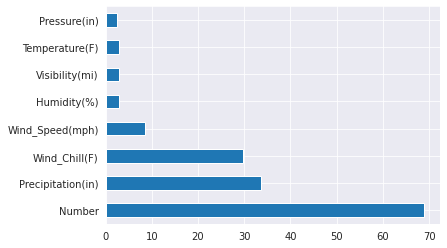

In [ ]:
#plotting as a graph
missing_percent[missing_percent>0].plot(kind='barh')

In [ ]:
#number column has so many missing values so it is of no use
numerical.drop(['Number'], axis=1 , inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#first of all we must handle outliers
import matplotlib.pyplot as plt
import seaborn as sns

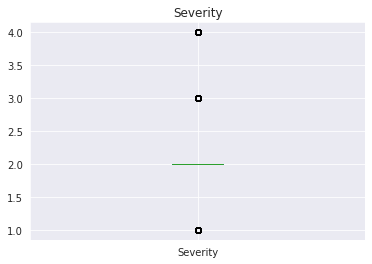

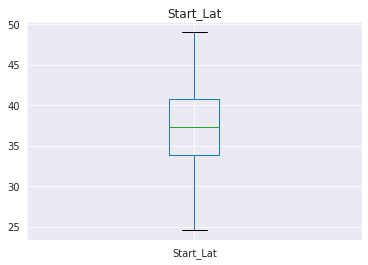

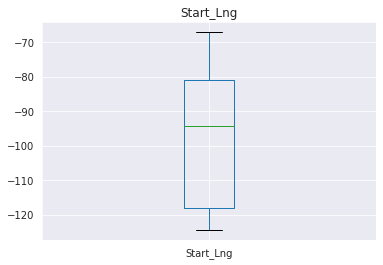

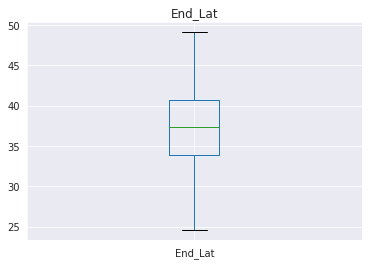

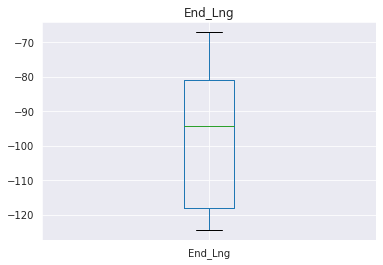

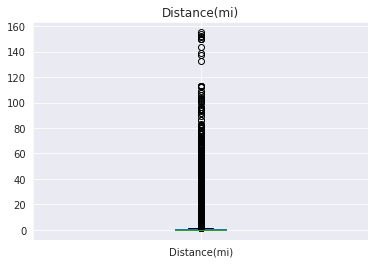

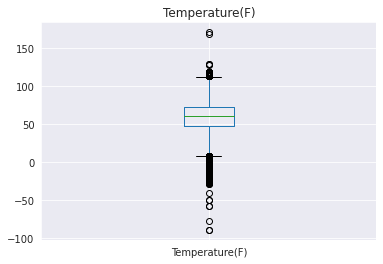

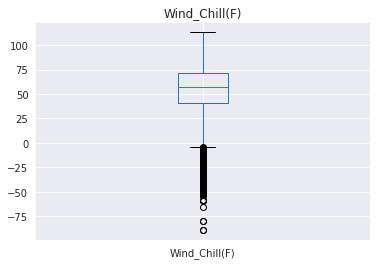

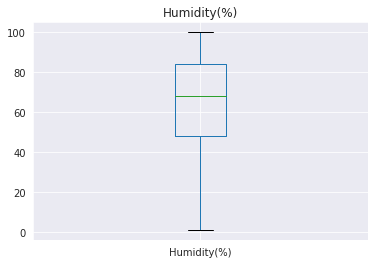

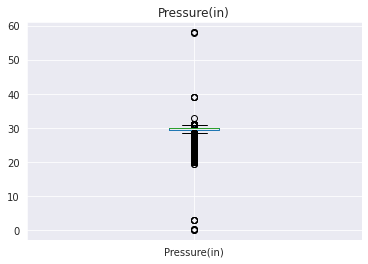

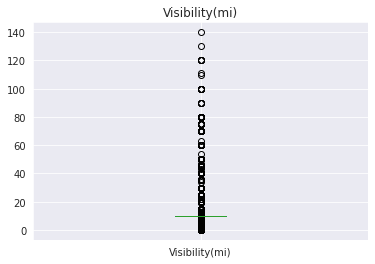

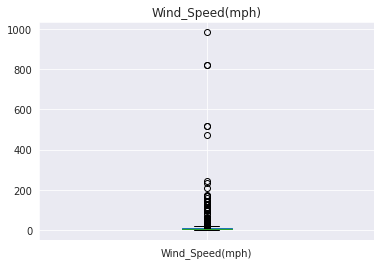

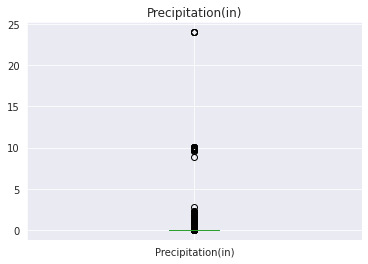

In [ ]:
for i in numerical:
  plt.figure()
  numerical.boxplot(column=[i])
  plt.title(i)

In [ ]:
#using IQR method
q1=numerical.quantile(0.25)
q3=numerical.quantile(0.75)
IQR=q3-q1
print(IQR)



Severity              0.000000
Start_Lat             6.871702
Start_Lng            37.332885
End_Lat               6.871726
End_Lng              37.333256
Distance(mi)          0.594000
Temperature(F)       26.000000
Wind_Chill(F)        30.200000
Humidity(%)          36.000000
Pressure(in)          0.600000
Visibility(mi)        0.000000
Wind_Speed(mph)       5.800000
Precipitation(in)     0.000000
dtype: float64


In [ ]:
upper_limit=q3+ 1.5*IQR
lower_limit=q1- 1.5*IQR
numerical_noout=numerical[(numerical>lower_limit)&(numerical<upper_limit)]


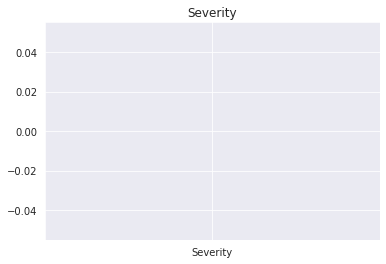

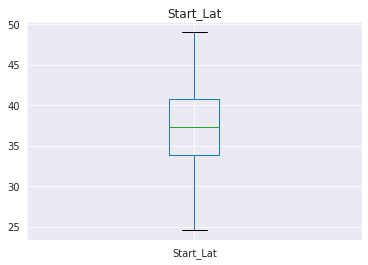

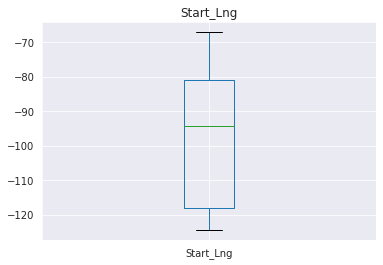

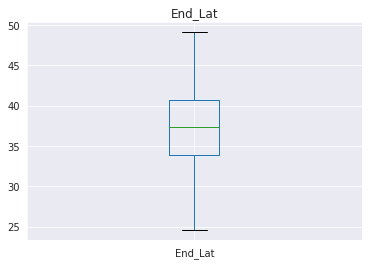

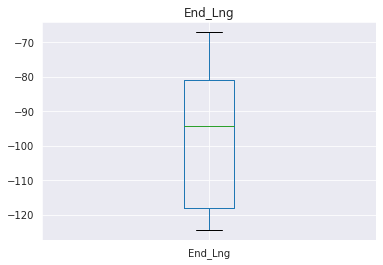

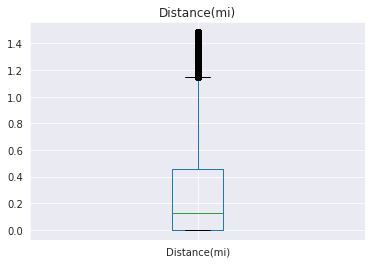

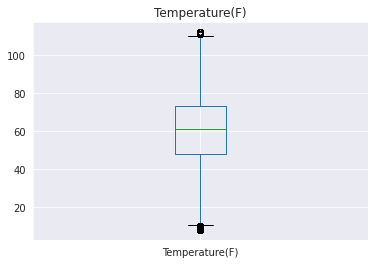

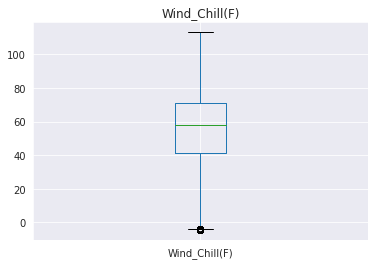

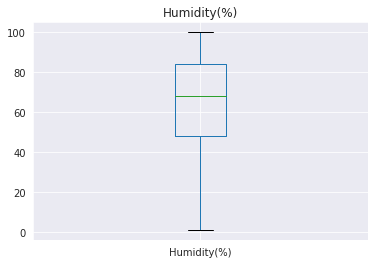

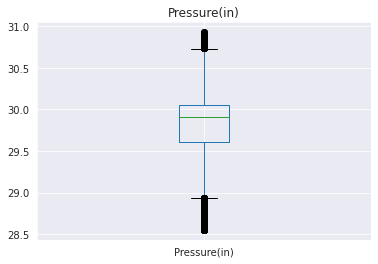

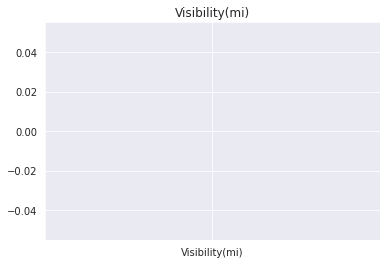

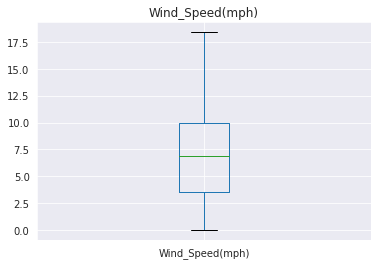

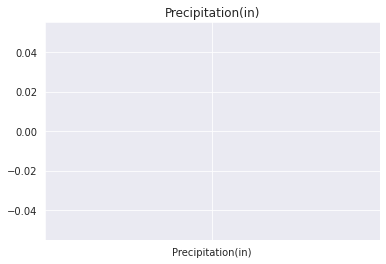

In [ ]:
for i in numerical_noout:
  plt.figure()
  numerical_noout.boxplot(column=[i])
  plt.title(i)

In [ ]:
#handling missing values
values_with_nan=[i for i in numerical.columns if numerical[i].isnull().sum()>1]
values_with_nan

['Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)']

In [ ]:
for i in values_with_nan:
  median_value= numerical[i].median()
  numerical[i].fillna(median_value,inplace=True)
  

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
numerical.isnull().sum()

Severity             0
Start_Lat            0
Start_Lng            0
End_Lat              0
End_Lng              0
Distance(mi)         0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Speed(mph)      0
Precipitation(in)    0
dtype: int64

In [ ]:
#finding non numerical columns
not_numerical=[i for i in df.columns if df[i].dtype== object and df[i].dtype!= bool]
not_numerical


['Start_Time',
 'End_Time',
 'Description',
 'Street',
 'Side',
 'City',
 'County',
 'State',
 'Zipcode',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Wind_Direction',
 'Weather_Condition',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [ ]:
#handling missing values
values=df[not_numerical]
nan_values=[i for i in values.columns if values[i].isnull().sum()>1]
nan_values

['City',
 'Zipcode',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Wind_Direction',
 'Weather_Condition',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [ ]:
for i in nan_values:
  values[i].fillna('missing data', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
values.isnull().sum()

Start_Time               0
End_Time                 0
Description              0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Wind_Direction           0
Weather_Condition        0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
dtype: int64

In [ ]:
cities_by_accident=values.City.value_counts()
cities_by_accident[:20]

Los Angeles     39984
Miami           36233
Charlotte       22203
Houston         20843
Dallas          19497
Sacramento      18431
Orlando         16169
Portland        14805
San Diego       14090
Minneapolis     12653
Atlanta         11854
Chicago         11507
Saint Paul      10084
Phoenix          9934
Raleigh          9516
San Jose         9362
Richmond         8472
Nashville        8381
Riverside        8201
Jacksonville     7815
Name: City, dtype: int64

**Data visualization part**

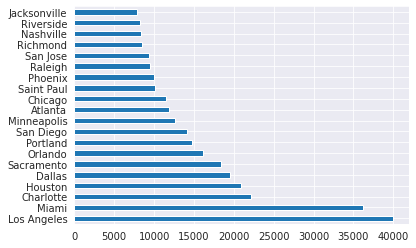

In [ ]:
# top 20 cities with the accidents
cities_by_accident[:20].plot(kind='barh')

In [ ]:
#lets find out the cities having more no of accidents
high_accidnt_cities=cities_by_accident[cities_by_accident>1000]
low_accident_cities=cities_by_accident[cities_by_accident<1000]


In [ ]:
sns.set_style('darkgrid')

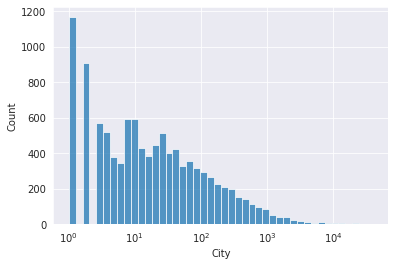

In [ ]:
sns.histplot(cities_by_accident , log_scale=True)

In [ ]:
values.Start_Time=pd.to_datetime(values['Start_Time'])

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
values['hour']=pd.DatetimeIndex(values.Start_Time).hour
values['day']=pd.DatetimeIndex(values.Start_Time).day
values['weekday']=pd.DatetimeIndex(values.Start_Time).weekday
values['month']=pd.DatetimeIndex(values.Start_Time).month
values['year']=pd.DatetimeIndex(values.Start_Time).year
values.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

Start_Time             End_Time  ... month  year
0 2016-02-08 00:37:08  2016-02-08 06:37:08  ...     2  2016
1 2016-02-08 05:56:20  2016-02-08 11:56:20  ...     2  2016
2 2016-02-08 06:15:39  2016-02-08 12:15:39  ...     2  2016
3 2016-02-08 06:15:39  2016-02-08 12:15:39  ...     2  2016
4 2016-02-08 06:51:45  2016-02-08 12:51:45  ...     2  2016

[5 rows x 23 columns]

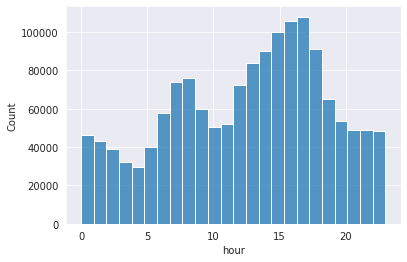

In [ ]:
sns.histplot(values.hour , bins=24)

most of the accidents occur between 6 am to 9 am and 12pm to 6 pm

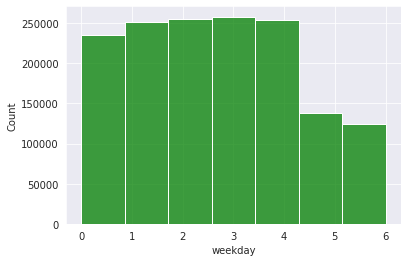

In [ ]:
sns.histplot(values.weekday , bins=7 , color='green')

less number of accidents are happening on weekends it means accidents are happeing when people are going for work om weekdays 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


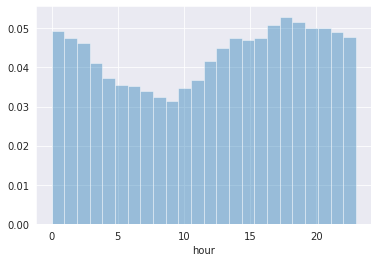

In [ ]:
sunday=values[values.weekday==6]
sns.distplot(sunday.hour, bins=24 , kde=False , norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


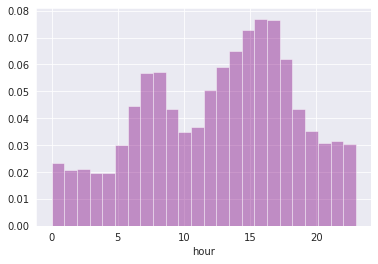

In [ ]:
monday=values[values.weekday==0]
sns.distplot(monday.hour, bins=24 , kde=False , norm_hist=True, color='purple')

on weekdays like monday most of the accidents are happening when people are going to work or returning from work but on weekends most of the accidents are happening after 3pm when they are going outside to enjoy

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


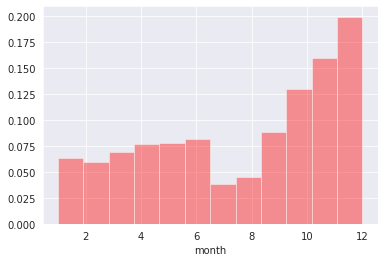

In [ ]:
sns.distplot(values.month , bins=12 , kde=False ,norm_hist=True , color='red')

end of year is the start of winter in USA hence it may be possible that there are more accidents due to the winter weather 

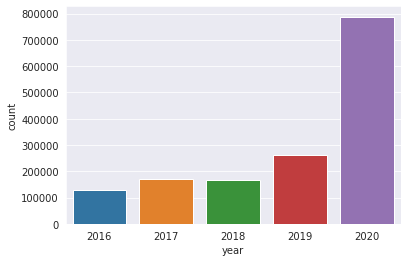

In [ ]:
sns.countplot(x=values['year'], data=values)

here we can see that as the year is increasing the number of accidents are also increasing.

In [ ]:
'''now we will try to plot the accidents according to area-wise on a googlemap
   using a heatmap '''

import folium

In [ ]:
from folium.plugins import HeatMap

In [ ]:
#creating a sample of our numerical columns
sample_num=numerical.sample(int(0.1*len(numerical)))

In [ ]:
map= folium.Map(location=[sample_num.Start_Lat.mean(),sample_num.Start_Lng.mean()],zoom_start=4) # folium.map() is used to plot google map and we have to provide location as a list of lattitude and longitude of a particular region
HeatMap(zip(list(sample_num.Start_Lat),list(sample_num.Start_Lng))).add_to(map) #in heatmap function first we are converting pandas series into a list and giving it to zip() to make a list of tuples
map